## Data Wrangling: WeRateDogs

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import re
import json
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 1. Gather Data

#### archive_df

In [2]:
archive_df = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
archive_df.shape

(2356, 17)

In [5]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### image_predictions_df

In [6]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [7]:
file_name = url.split('/')[-1]
file_name

'image-predictions.tsv'

In [8]:
if not os.path.isfile(file_name):
    with open(file_name, mode='wb') as file:
        file.write(response.content)

In [9]:
image_predictions_df = pd.read_csv("image-predictions.tsv", sep="\t")
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
image_predictions_df.shape

(2075, 12)

In [11]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### api_df

In [13]:
api_file = "tweet-json copy"
api_list = []
with open(api_file, mode='r') as file:
    for line in file:
        api_list.append(json.loads(line))

In [14]:
api_df = pd.DataFrame(api_list)
api_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [15]:
api_df.shape

(2354, 31)

In [16]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

### 2. Assess Data

#### Quality Issues:

a. **archive_df**
1. Should include only original ratings tweets (remove retweets and replies)
2. Missing values at "expanded_urls" are for tweets without photos (could be dropped safely)
3. Most of records are null at these columns "in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp" (could be dropped)
4. Datatype of "tweet_id" is int (should be str format)

b. **image_predictions_df**
5. Column name of "p1, p1_conf, p1_dog ..." are not descriptive
6. Datatype of "tweet_id" is int (should be str format)
7. Tweets with no images should be dropped (total tweets at archive_df more than images at image_predictions_df)

c. **api_df**
8. Most of records are null at these columns "contributors, coordinates, geo, in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, place" (could be dropped)

#### Tidiness:

a. **archive_df**
1. Column names are values for "doggo, floofer, pupper, puppo"

b. **api_df**
2. Multiple variables are listed in one column "display_text_range" (should be splitted into 2 columns "display_text_min & display_text_max")

### 3. Clean Data

#### Define (1):
archive_df: Should include only original ratings tweets by remove retweets and replies defined at "in_reply_to_status_id" and "retweeted_status_id"

#### Code:

In [17]:
archive_df_clean = archive_df.copy()

In [18]:
archive_df_clean = archive_df_clean[archive_df_clean.in_reply_to_status_id.isnull()==True].reset_index(drop=True)

In [19]:
archive_df_clean = archive_df_clean[archive_df_clean.retweeted_status_id.isnull()==True].reset_index(drop=True)

#### Test:

In [20]:
archive_df.shape

(2356, 17)

In [21]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
archive_df_clean.shape

(2097, 17)

In [23]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [24]:
#Sum of replies and retweets
(archive_df.in_reply_to_status_id.isnull()==False).sum() + (archive_df.retweeted_status_id.isnull()==False).sum()

259

In [25]:
#Difference between dataframe before and after removing replies and retweets
archive_df.shape[0] - archive_df_clean.shape[0]

259

#### Define (2):
archive_df: Missing values at "expanded_urls" are for tweets without photos and could be dropped safely

#### Code:

In [26]:
archive_df_clean = archive_df_clean[archive_df_clean.expanded_urls.isnull()==False].reset_index(drop=True)

#### Test:

In [27]:
archive_df_clean.shape

(2094, 17)

In [28]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null object
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: float64(4), int64(3), object(10)

In [29]:
(archive_df_clean.expanded_urls.isnull()==False).sum()

2094

#### Define (3):
archive_df: Most of records are null at these columns "in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_userid, retweeted_status_timestamp", they are used to define replies and retweets, and they are not needed anymore. They could be dropped safely

#### Code:

In [30]:
archive_df_clean.shape

(2094, 17)

In [31]:
archive_df_clean.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id",
                      "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1, inplace=True)

#### Test:

In [32]:
archive_df_clean.shape

(2094, 12)

In [33]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(9)
memory usage: 196.4+ KB


#### Define (4):
archive_df: Datatype of "tweet_id" is int and should be str format

#### Code:

In [34]:
archive_df_clean["tweet_id"] = archive_df_clean["tweet_id"].astype(str)

#### Test:

In [35]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(2), object(10)
memory usage: 196.4+ KB


#### Define (5):
image_predictions_df: Column name of "p1, p1_conf, p1_dog ..." are not descriptive

#### Code:

In [36]:
image_predictions_df_clean = image_predictions_df.copy()

In [37]:
image_predictions_df_clean = image_predictions_df_clean.rename(columns={"p1":"probability1", "p1_conf":"probability1_conf",
                                                                "p1_dog":"probability1_dog", "p2":"probability2",
                                                                "p2_conf":"probability2_conf", "p2_dog":"probability2_dog",
                                                                "p3":"probability3", "p3_conf":"probability3_conf",
                                                                "p3_dog":"probability3_dog"})

#### Test:

In [38]:
image_predictions_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [39]:
image_predictions_df_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'probability1', 'probability1_conf',
       'probability1_dog', 'probability2', 'probability2_conf',
       'probability2_dog', 'probability3', 'probability3_conf',
       'probability3_dog'],
      dtype='object')

#### Define (6):
image_predictions_df: Datatype of "tweet_id" is int and should be str format

#### Code:

In [40]:
image_predictions_df_clean["tweet_id"] = image_predictions_df_clean["tweet_id"].astype(str)

#### Test:

In [41]:
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id             2075 non-null object
jpg_url              2075 non-null object
img_num              2075 non-null int64
probability1         2075 non-null object
probability1_conf    2075 non-null float64
probability1_dog     2075 non-null bool
probability2         2075 non-null object
probability2_conf    2075 non-null float64
probability2_dog     2075 non-null bool
probability3         2075 non-null object
probability3_conf    2075 non-null float64
probability3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define (7):
image_predictions_df: Tweets with no images should be dropped (2094 total tweets at archive_df vs. only 2075 images at image_predictions_df)

#### Code:

In [42]:
archive_df_clean.shape[0]

2094

In [43]:
image_predictions_df_clean.shape[0]

2075

In [44]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 12 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(2), object(10)
memory usage: 196.4+ KB


In [45]:
image_predictions_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id             2075 non-null object
jpg_url              2075 non-null object
img_num              2075 non-null int64
probability1         2075 non-null object
probability1_conf    2075 non-null float64
probability1_dog     2075 non-null bool
probability2         2075 non-null object
probability2_conf    2075 non-null float64
probability2_dog     2075 non-null bool
probability3         2075 non-null object
probability3_conf    2075 non-null float64
probability3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [46]:
archive_df_clean = archive_df_clean[archive_df_clean['tweet_id'].isin(image_predictions_df_clean['tweet_id'])].reset_index(drop=True)

In [47]:
image_predictions_df_clean = image_predictions_df_clean[image_predictions_df_clean['tweet_id'].isin(archive_df_clean['tweet_id'])].reset_index(drop=True)

#### Test:

In [48]:
archive_df_clean.shape[0]

1971

In [49]:
image_predictions_df_clean.shape[0]

1971

In [50]:
archive_df_clean['tweet_id'].isin(image_predictions_df_clean['tweet_id']).value_counts()

True    1971
Name: tweet_id, dtype: int64

#### Define (8):
api_df: Most of records are null at these columns "contributors, coordinates, geo, in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, place" .. They could be dropped safely

#### Code:

In [51]:
api_df_clean = api_df.copy()

In [52]:
api_df_clean.drop(["contributors", "coordinates", "geo", "in_reply_to_screen_name", "in_reply_to_status_id",
                   "in_reply_to_status_id_str", "in_reply_to_user_id", "in_reply_to_user_id_str", "place"],
                   axis=1, inplace=True)

#### Test:

In [53]:
api_df.shape[1]

31

In [54]:
api_df_clean.shape[1]

22

#### Define (9):
archive_df: Column names are values for "doggo, floofer, pupper, puppo", should be merged at same column "dog_breed"

#### Code:

In [55]:
archive_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [56]:
archive_df_clean["dog_breed"] = np.where(archive_df_clean["doggo"]!="None", "doggo",
                                         (np.where(archive_df_clean["floofer"]!="None", "floofer",
                                                   (np.where(archive_df_clean["pupper"]!="None", "pupper",
                                                             np.where(archive_df_clean["puppo"]!="None", "puppo", "None"))))))

In [57]:
archive_df_clean.drop(["doggo", "floofer", "pupper", "puppo"], axis=1, inplace=True)

#### Test:

In [58]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 9 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_breed             1971 non-null object
dtypes: int64(2), object(7)
memory usage: 138.7+ KB


#### Define (10):
api_df: Multiple variables are listed in one column "display_text_range", would be splitted into 2 columns "display_text_min & display_text_max""

#### Code:

In [59]:
api_df_clean.head()

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,is_quote_status,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336193,False,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,892177421306343426,False,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,891815181378084864,False,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,891689557279858688,False,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,891327558926688256,891327558926688256,False,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [60]:
api_df_clean[["display_text_min","display_text_max"]] = pd.DataFrame(api_df_clean["display_text_range"].values.tolist())

In [61]:
api_df_clean.drop(["display_text_range"], axis=1, inplace=True)

#### Test:

In [62]:
api_df_clean.columns

Index(['created_at', 'entities', 'extended_entities', 'favorite_count',
       'favorited', 'full_text', 'id', 'id_str', 'is_quote_status', 'lang',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user',
       'display_text_min', 'display_text_max'],
      dtype='object')

### 4. Store Data

In [64]:
#Save final cleaned dataframes to CSV files
archive_df_clean.to_csv("Twitter_archive_master.csv", index=False)
image_predictions_df_clean.to_csv("Twitter_image_predictions_master.csv", index=False)
archive_df_clean.to_csv("Twitter_api_master.csv", index=False)

### 5. Analyze & Visualize Data

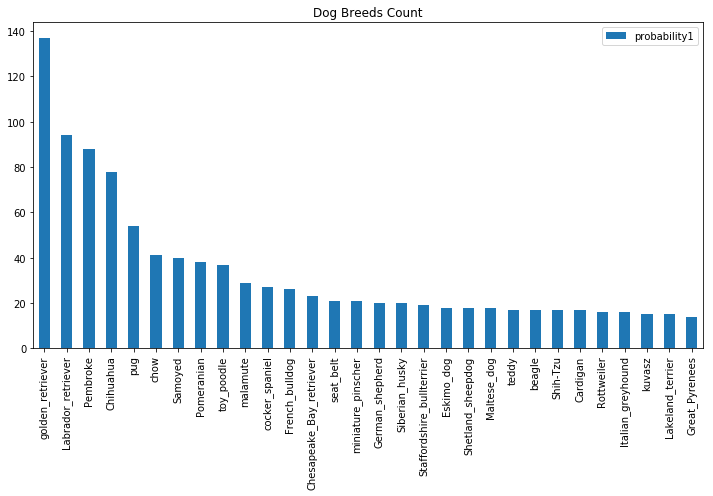

In [95]:
pd.DataFrame(image_predictions_df_clean["probability1"].value_counts()).nlargest(30, "probability1").plot(kind="bar", title="Dog Breeds Count", figsize=(12,6));

In [135]:
image_predictions_df_clean["probability1"].describe()

count                 1971
unique                 373
top       golden_retriever
freq                   137
Name: probability1, dtype: object

#### We have 373 unique breed, with "Golden Retriever" as the highest probability breed

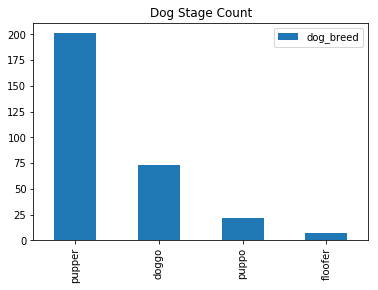

In [122]:
pd.DataFrame(archive_df_clean["dog_breed"].value_counts()).drop("None", axis=0).plot(kind="bar", title="Dog Stage Count");

#### We have 4 main dog stages, with "Pupper" as the most appeared stage

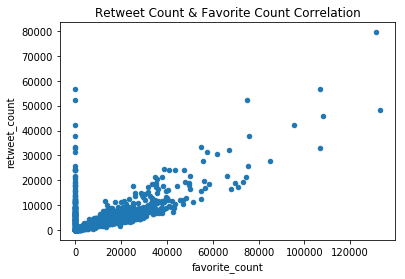

In [98]:
api_df_clean.plot.scatter("favorite_count", "retweet_count", title="Retweet Count & Favorite Count Correlation");

#### There is a clear high positive correlation between Retweet Count & Favorite Count

In [117]:
dogs_rating = pd.DataFrame()
dogs_rating['rating'] = archive_df_clean['rating_numerator']/archive_df_clean['rating_denominator']
dogs_rating['dog_stage'] = archive_df_clean['dog_breed']

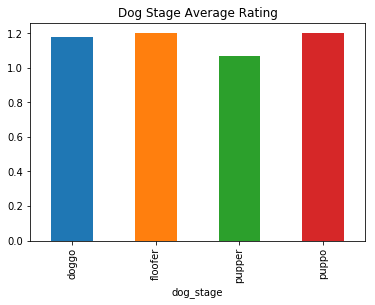

In [121]:
dogs_rating.groupby('dog_stage')['rating'].mean().drop('None', axis=0).plot(kind="bar", title="Dog Stage Average Rating");

#### Average rating for all dog stages are almost equal

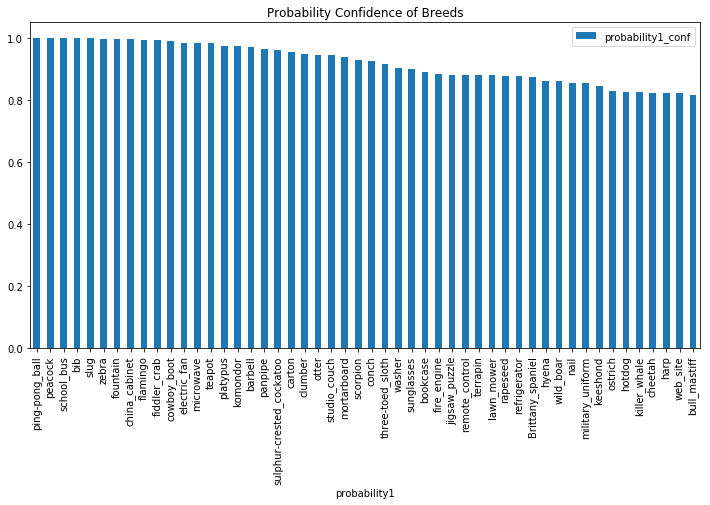

In [130]:
pd.DataFrame(image_predictions_df_clean.groupby('probability1')['probability1_conf'].mean()).nlargest(50,'probability1_conf').plot(kind='bar', title='Probability Confidence of Breeds', figsize=(12,6));